<a href="https://colab.research.google.com/github/andhikaaria/MachineLearning/blob/main/mgg4/Data_Visualiztion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Andhika Aria Pratama Nugraha
#1103202121
#Tugas ke mgg3
#import library yang dibutuhkan
from google.colab import drive  # Mengimpor modul yang diperlukan untuk mengakses Google Drive
import pandas as pd  # Mengimpor modul pandas untuk manipulasi dan analisis data
import seaborn as sns  # Mengimpor Seaborn, sebuah library untuk visualisasi data
import matplotlib.pyplot as plt  # Mengimpor matplotlib.pyplot untuk visualisasi data menggunakan matplotlib
import plotly.express as px  # Mengimpor Plotly Express untuk visualisasi data interaktif
import plotly.graph_objects as go  # Mengimpor Plotly Graph Objects untuk visualisasi data interaktif lebih lanjut
import ipywidgets as widgets  # Mengimpor ipywidgets untuk membuat widget interaktif
from ipywidgets import interact  # Mengimpor modul interact dari ipywidgets untuk mengatur widget interaktif
from ipywidgets import widgets  # Mengimpor kembali ipywidgets, modul yang digunakan untuk membuat widget interaktif
from IPython.display import display  # Mengimpor modul display dari IPython untuk menampilkan widget interaktif
from ipywidgets import interactive  # Mengimpor interactive dari ipywidgets untuk menghasilkan visualisasi interaktif
import numpy as np  # Mengimpor numpy untuk operasi matematika


In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#Membaca file dan mengubah ke dataframe
file_path = '/content/drive/My Drive/Dataset/diamonds.csv'
df = pd.read_csv(file_path)
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
# Daftar kolom yang ingin Anda hitung jumlah nilai uniknya
kolom_kolom = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

# Menghitung jumlah nilai unik untuk setiap kolom
for kolom in kolom_kolom:
    unique_count = df[kolom].nunique()
    print(f"Jumlah nilai unik untuk kolom '{kolom}': {unique_count}")


Jumlah nilai unik untuk kolom 'carat': 273
Jumlah nilai unik untuk kolom 'cut': 5
Jumlah nilai unik untuk kolom 'color': 7
Jumlah nilai unik untuk kolom 'clarity': 8
Jumlah nilai unik untuk kolom 'depth': 184
Jumlah nilai unik untuk kolom 'table': 127
Jumlah nilai unik untuk kolom 'price': 11602
Jumlah nilai unik untuk kolom 'x': 554
Jumlah nilai unik untuk kolom 'y': 552
Jumlah nilai unik untuk kolom 'z': 375


In [6]:
# Kolom-kolom numerik
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Kolom-kolom kategoris
categorical_features = ['cut', 'color', 'clarity']

# Kolom target
target = ['price']
print(numerical_features)
print(categorical_features)
print(target)

['carat', 'depth', 'table', 'x', 'y', 'z']
['cut', 'color', 'clarity']
['price']


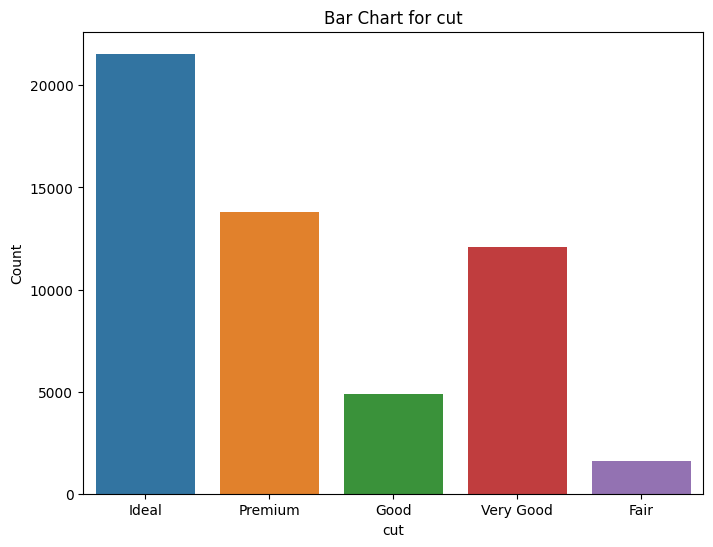

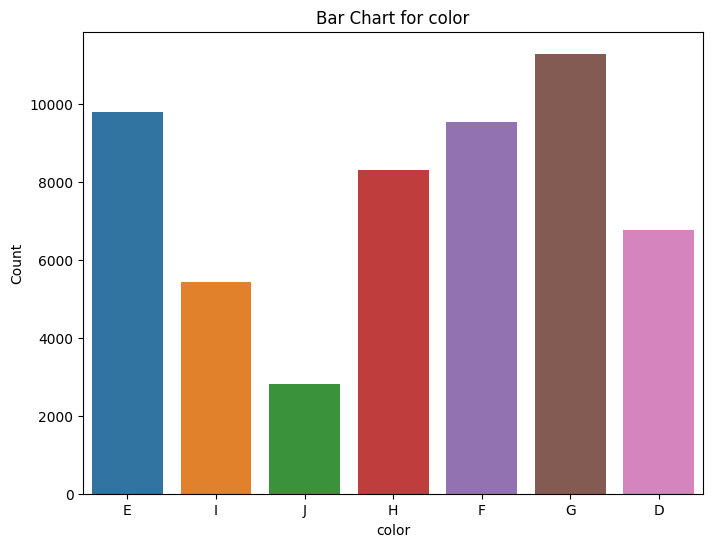

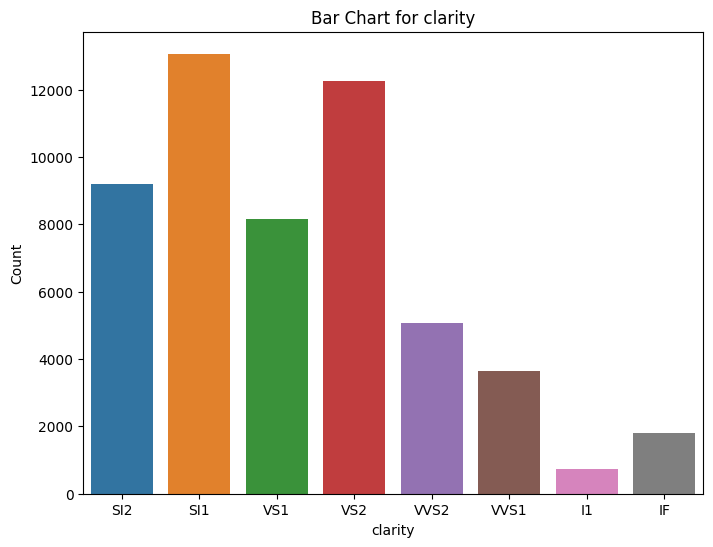

In [7]:
# Plot bar chart
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Bar Chart for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

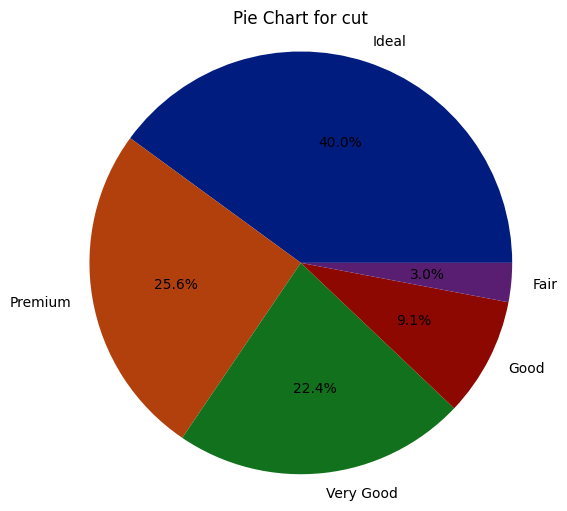

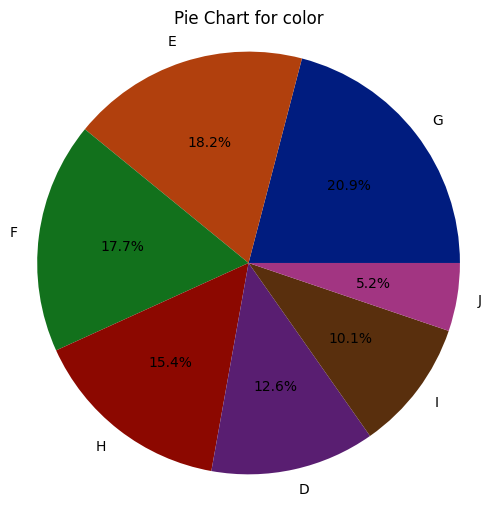

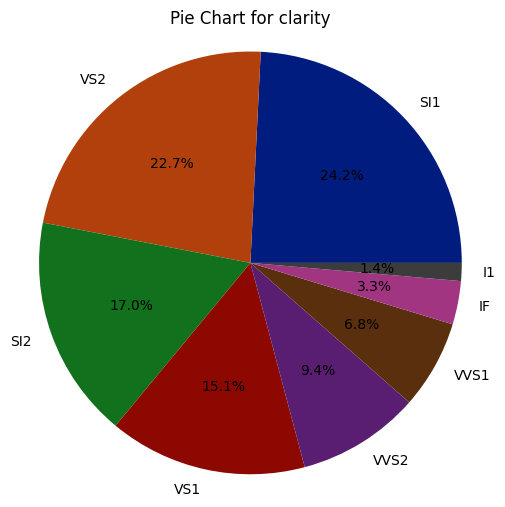

In [8]:
# Set the color palette to a dark theme
sns.set_palette("dark")

# Data
categorical_features = ['cut', 'color', 'clarity']

# Loop through each categorical feature
for feature in categorical_features:
    category_counts = df[feature].value_counts()

    # Create a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart for {feature}')
    plt.axis('equal')  # Ensure the pie chart is circular
    plt.show()

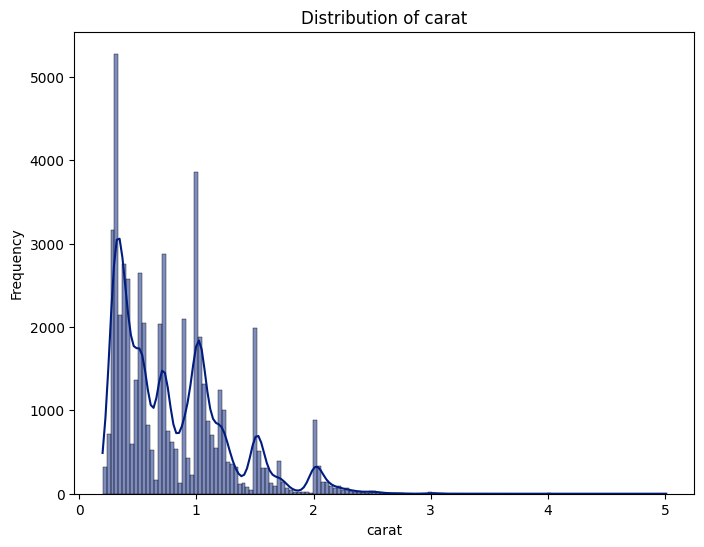

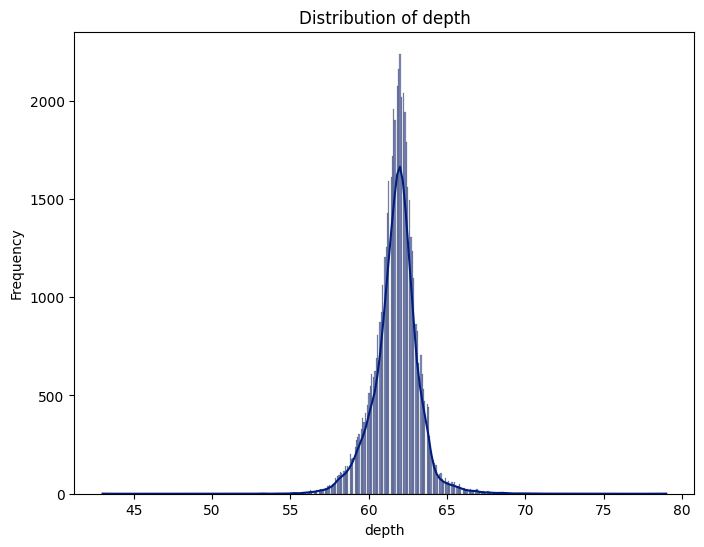

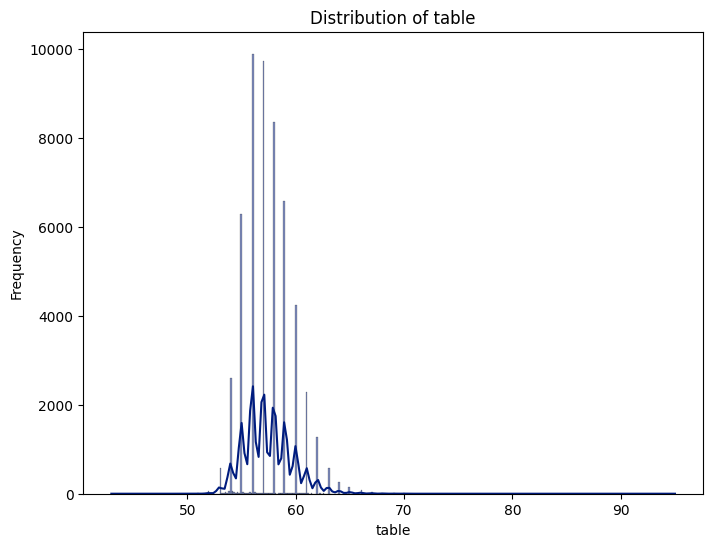

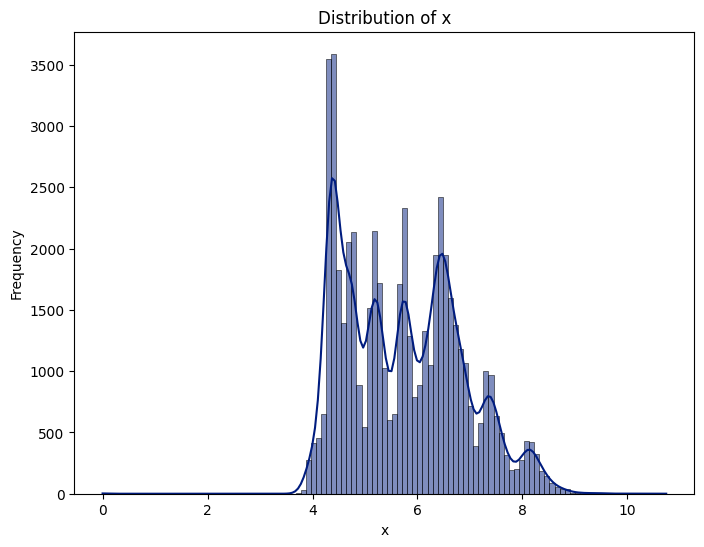

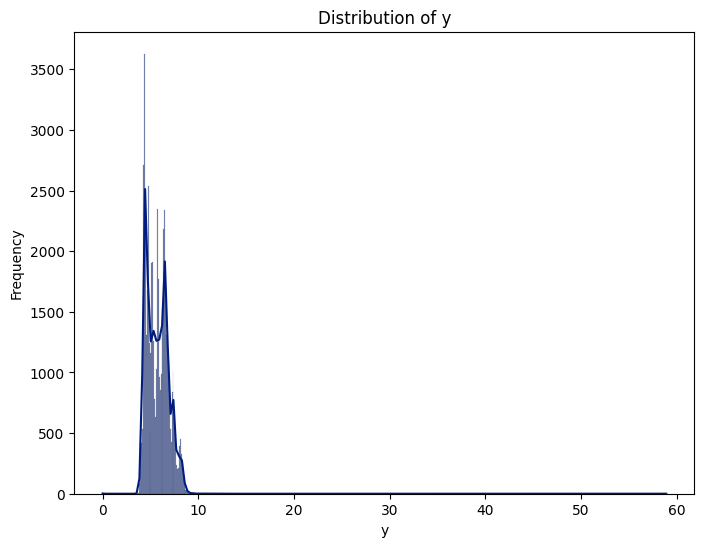

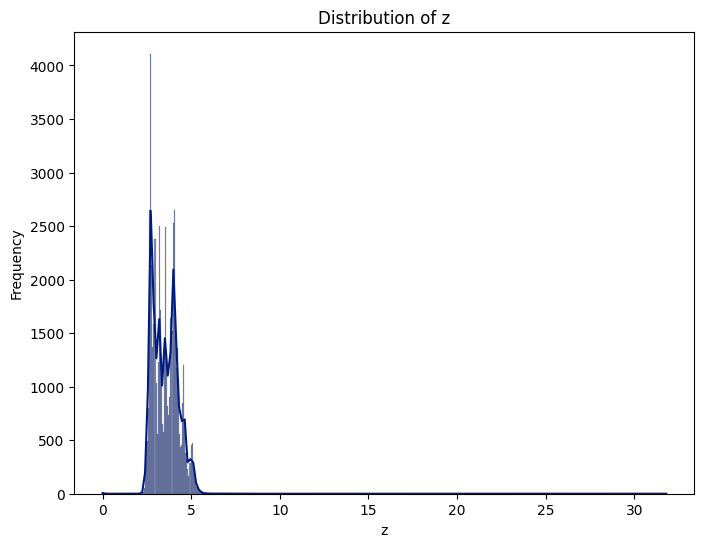

In [9]:
# Loop through each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

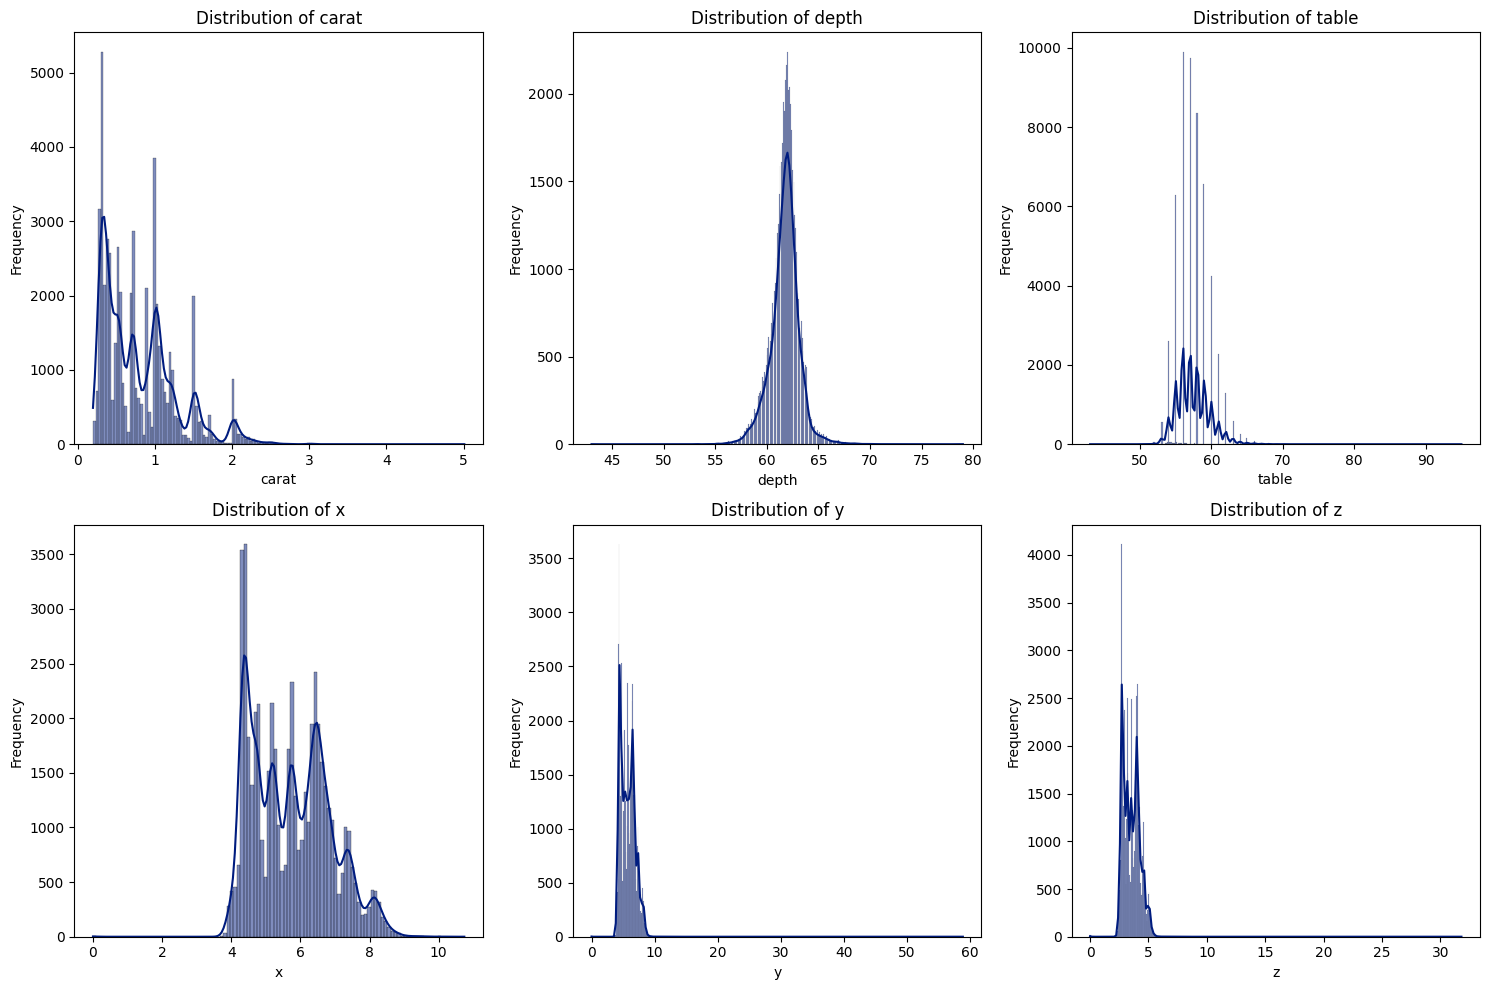

In [10]:
# Membuat subplot dengan 2 baris dan 3 kolom
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Loop through each numerical feature
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(data=df, x=feature, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Mengatur layout
plt.tight_layout()
plt.show()

In [11]:
# Fungsi untuk membuat histogram interaktif
def plot_histogram(bin_width=1, feature='carat'):
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=np.arange(df[feature].min(), df[feature].max() + bin_width, bin_width), edgecolor='k')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Membuat kontrol interaktif untuk setiap fitur numerik
for feature in numerical_features:
    bin_width_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='Bin Width:')
    interactive_plot = interactive(plot_histogram, bin_width=bin_width_slider, feature=feature)
    display(interactive_plot)

interactive(children=(FloatSlider(value=1.0, description='Bin Width:', max=10.0, min=0.1), Text(value='carat',…

interactive(children=(FloatSlider(value=1.0, description='Bin Width:', max=10.0, min=0.1), Text(value='depth',…

interactive(children=(FloatSlider(value=1.0, description='Bin Width:', max=10.0, min=0.1), Text(value='table',…

interactive(children=(FloatSlider(value=1.0, description='Bin Width:', max=10.0, min=0.1), Text(value='x', des…

interactive(children=(FloatSlider(value=1.0, description='Bin Width:', max=10.0, min=0.1), Text(value='y', des…

interactive(children=(FloatSlider(value=1.0, description='Bin Width:', max=10.0, min=0.1), Text(value='z', des…

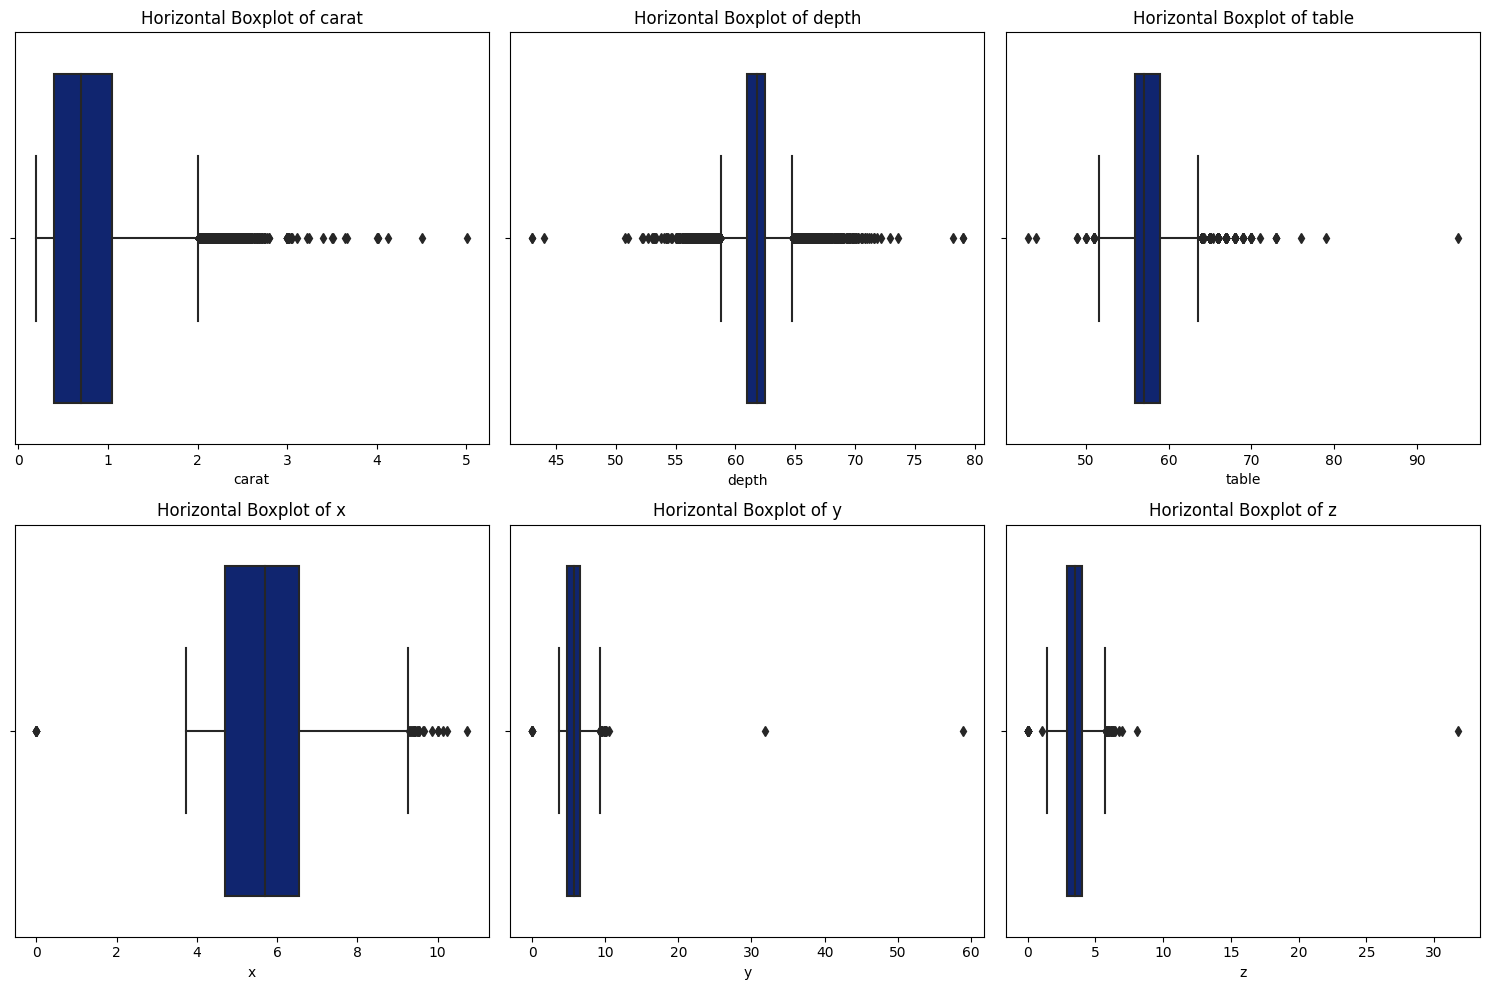

In [12]:
# Membuat subplot dengan 2 baris dan 3 kolom dengan boxplot horizontal
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Loop through each numerical feature
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df, x=feature, orient='h', ax=axes[row, col])
    axes[row, col].set_title(f'Horizontal Boxplot of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('')

# Mengatur layout
plt.tight_layout()
plt.show()